# Data Dive 4
## Real Estate Agency

### James Evans, Brent Yelle, Sabrina Peterson, Nicholas Sartino

In [147]:
# Modules

#!pip install missingno
# Comment out if not needed - used briefly to export png images from bar graphs.
#!pip install plotly-orca
#!pip install -U kaleido

In [148]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import seaborn as sns
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.io as pio

import missingno as msno


In [149]:
# Read data
df = (pd.read_csv('housing.csv', header = 0))

# Basic Data Information

In [150]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
# Basic Stats

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

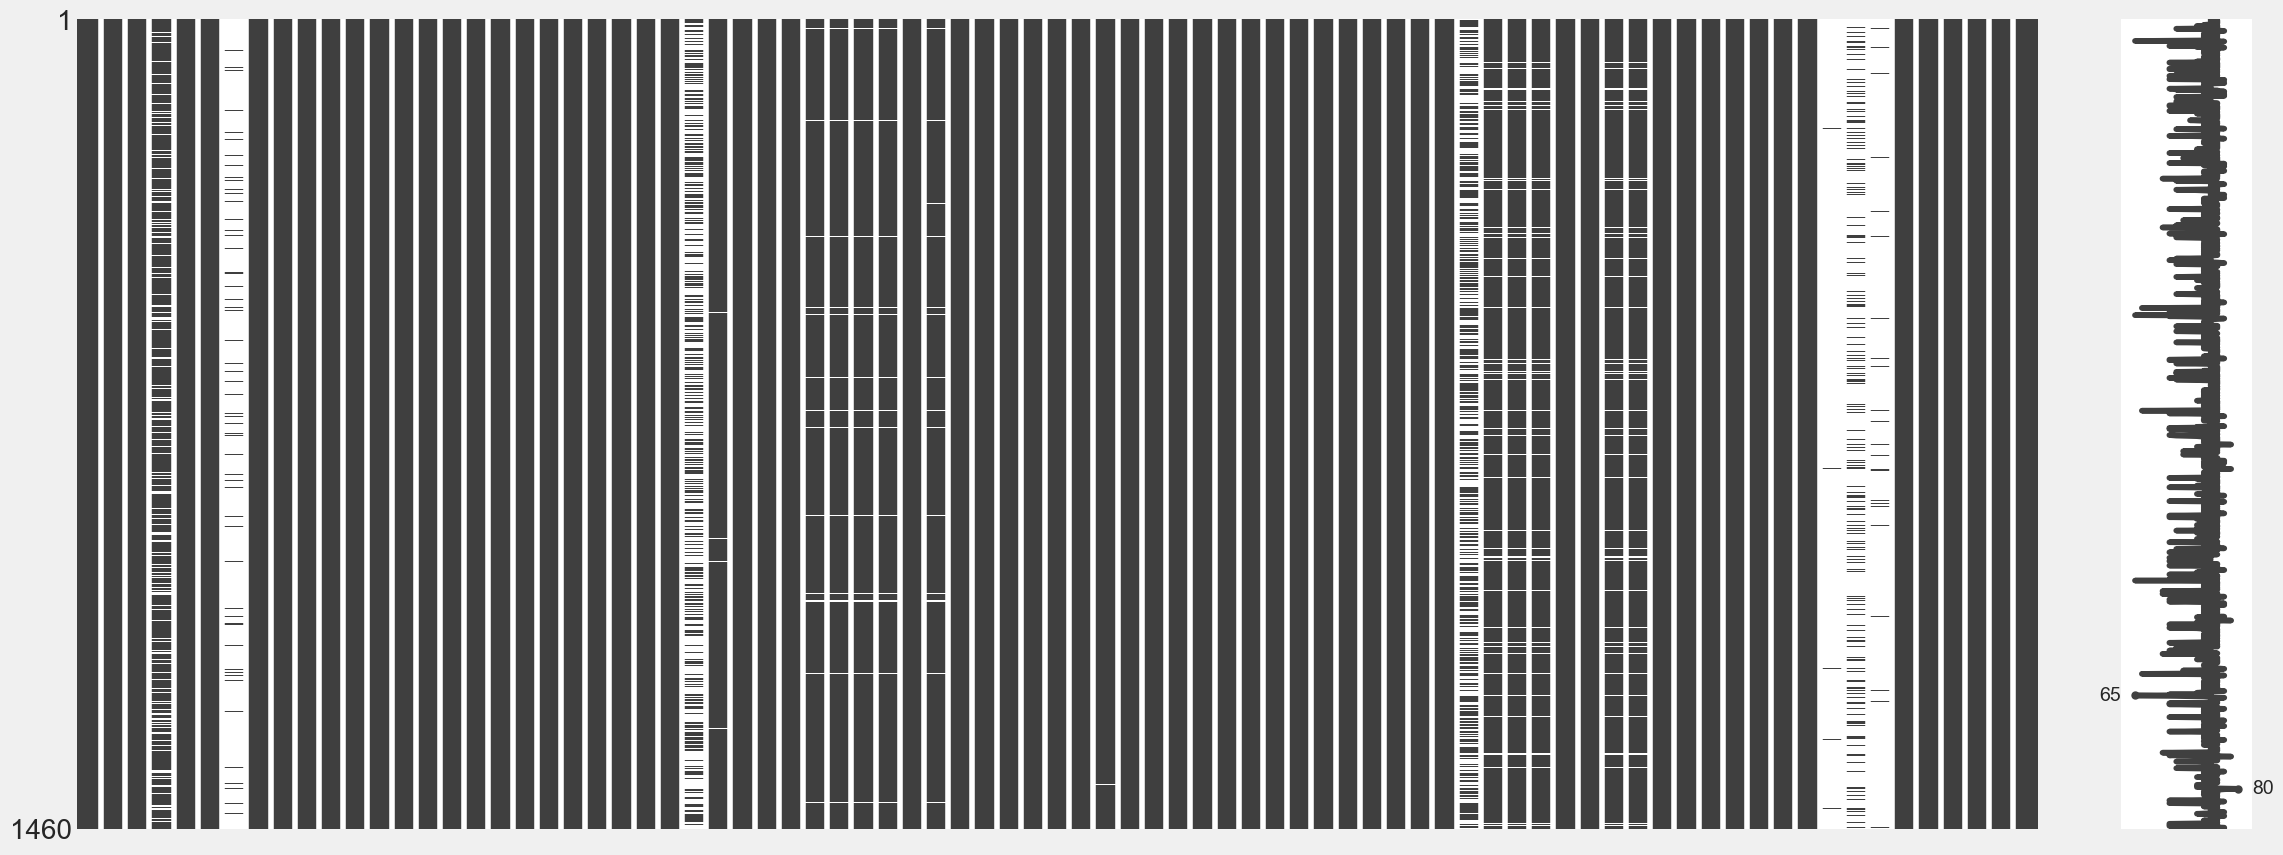

In [152]:
# Visualize missing values

msno.matrix(df)

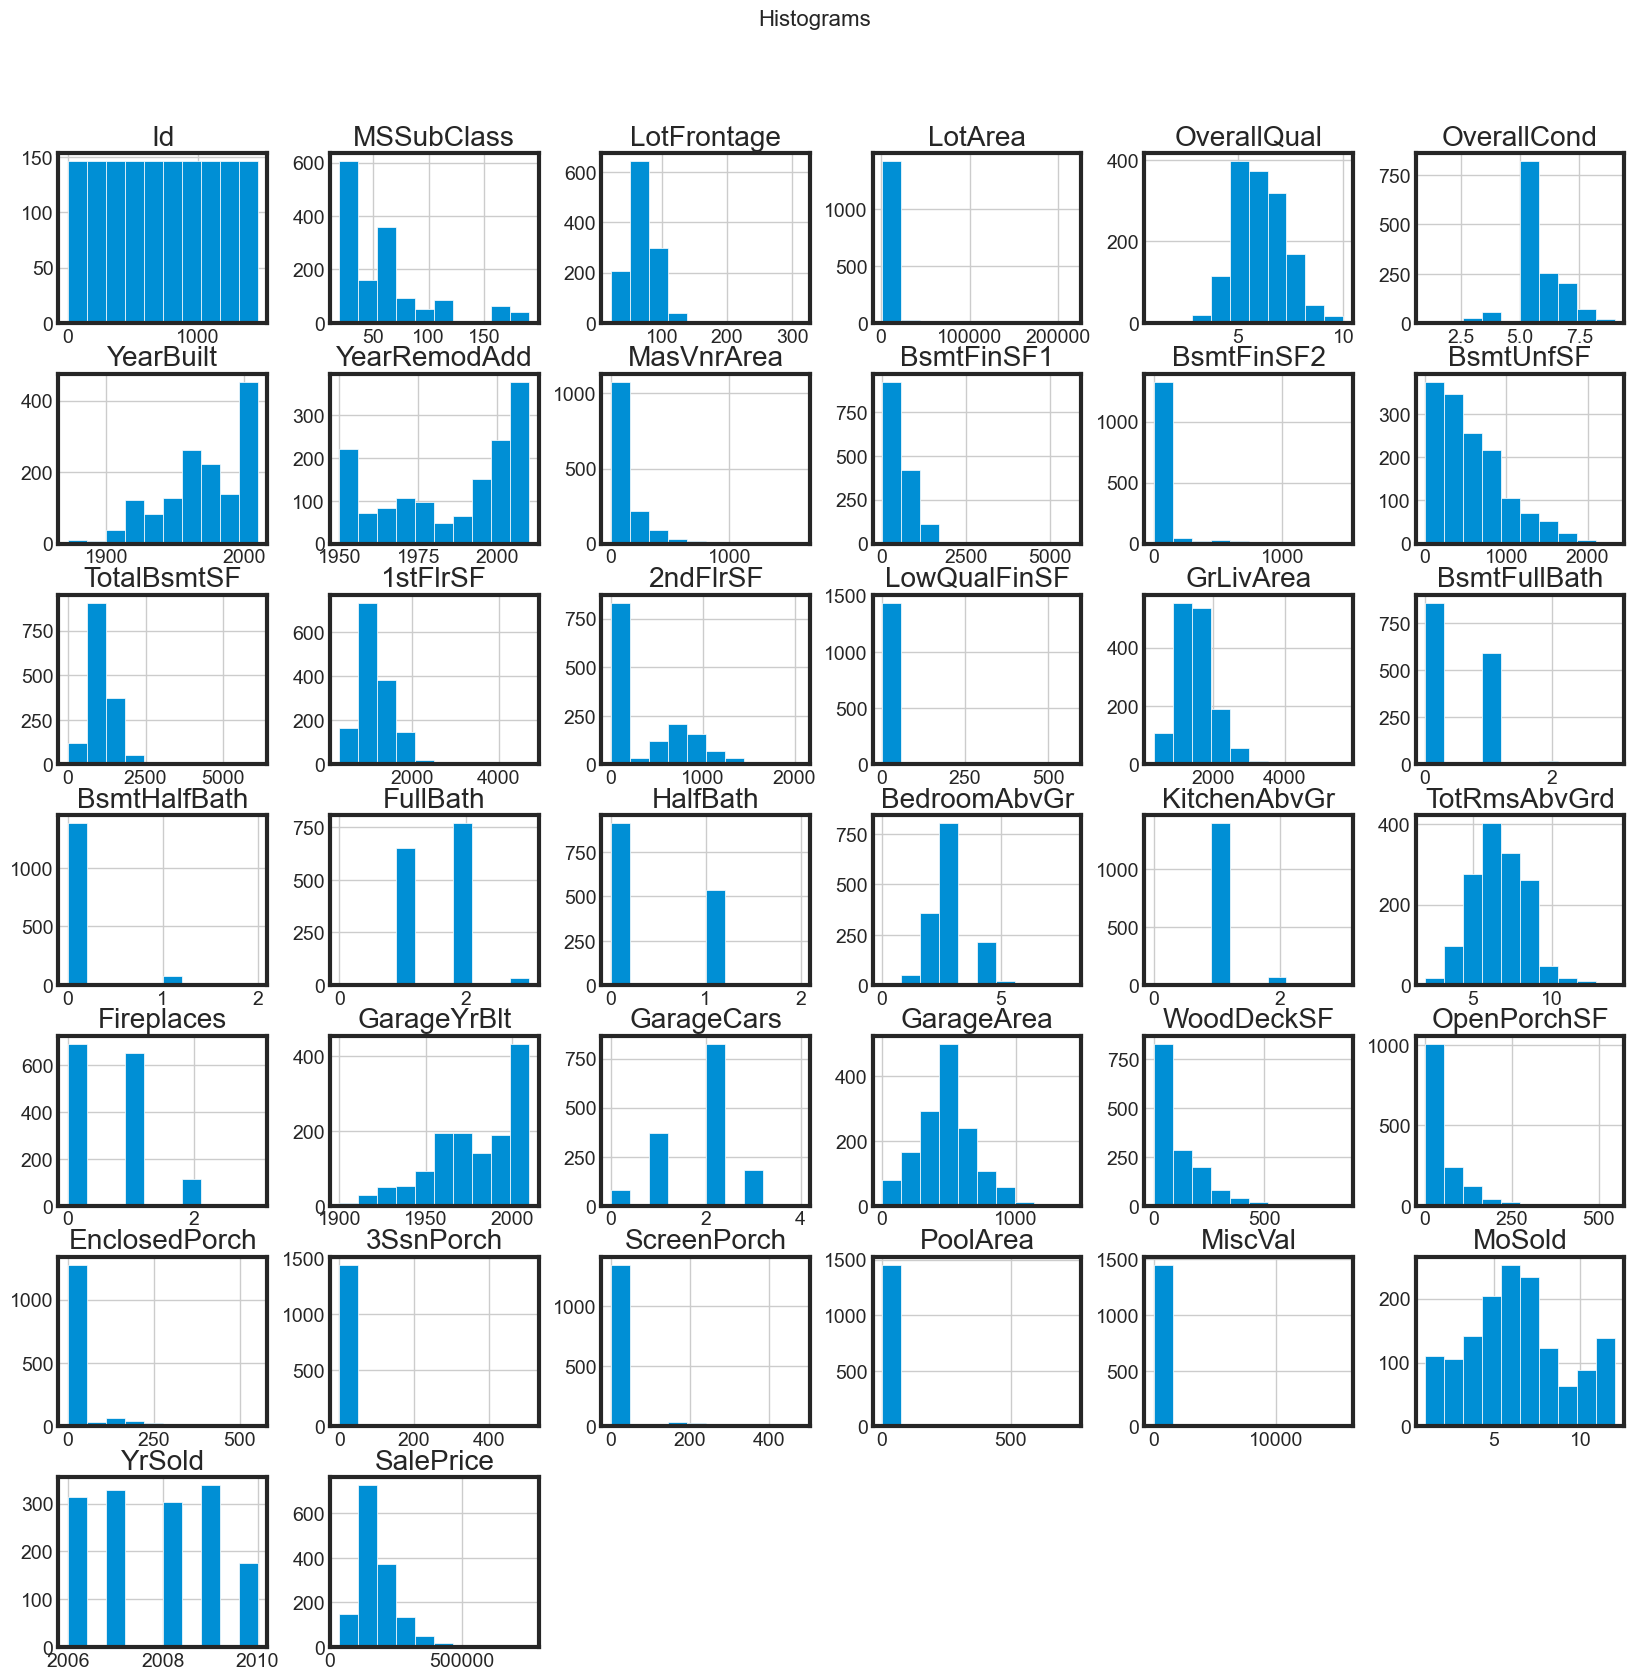

In [210]:
# Histograms
df.hist(figsize=(18, 18))

# Customize titles to make them smaller
plt.suptitle('Histograms', fontsize=16)  # Overall title
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the subtitle

plt.show()

In [154]:
# Choose the column for which you want to print distinct values
column_to_check = 'Neighborhood'

# Use the unique() function directly
distinct_values = df[column_to_check].unique()

# Print distinct values
for value in distinct_values:
    print(value)

CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste


In [155]:
# Join neighborhood_names and append column to dataframe for cleaner names

df_neighborhoods = (pd.read_csv('neighborhood_names', header = 0))

df_neighborhoods.drop(columns=['Unnamed: 2'],inplace=True)

# Perform the left join and select only the 'Neighborhood_info' column from the foreign table
result_df = pd.merge(df, df_neighborhoods[['Neighborhood_id', 'Neighborhood_info']], left_on='Neighborhood', right_on='Neighborhood_id', how='left')

# Drop the redundant 'Neighborhood_id' column
result_df = result_df.drop('Neighborhood_id', axis=1)

result_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_info
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,College Creek
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Veenker
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,College Creek
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Crawford
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Northridge


In [156]:
# Null Counts

result_df.isnull().sum() 

Id                     0
MSSubClass             0
MSZoning               0
LotFrontage          259
LotArea                0
                    ... 
YrSold                 0
SaleType               0
SaleCondition          0
SalePrice              0
Neighborhood_info      0
Length: 82, dtype: int64

In [157]:
# Copy into original dataframe
df = result_df.copy()

# James' Charts

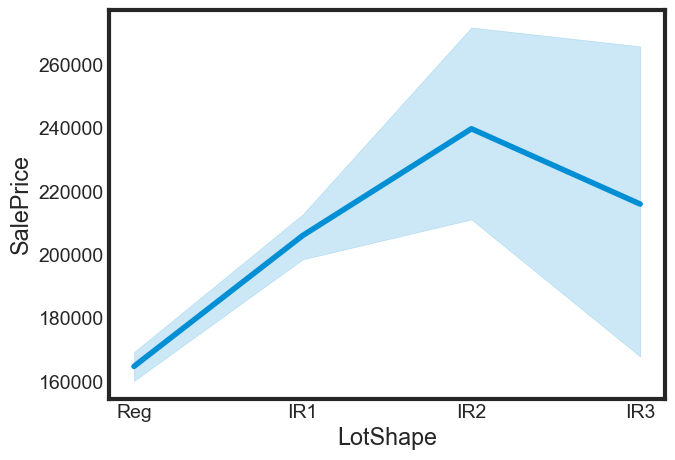

In [234]:
## Looking at the irregularity of lot shape
sns.lineplot(data=df,x='LotShape',y='SalePrice')

ir1_df = df[df['LotShape']=='IR1']

<Axes: xlabel='LotShape', ylabel='SalePrice'>

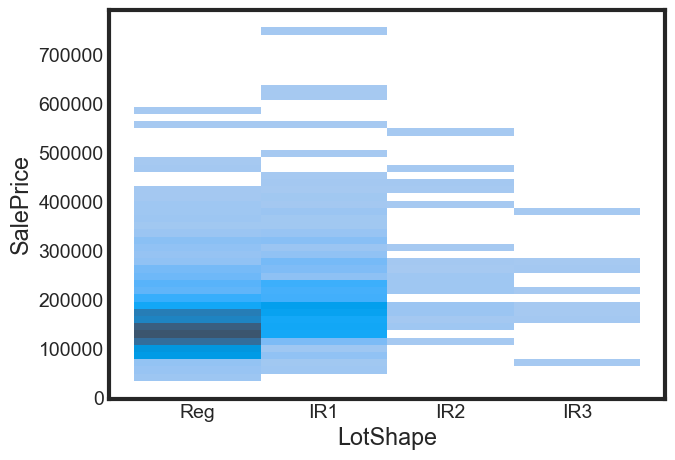

In [235]:
# Another option of looking at shape
sns.histplot(data=df,x='LotShape',y='SalePrice')

In [238]:
df['SalePrice'].groupby(df['LotShape']).agg(['median','mean'])
#house_df['GrLivArea'].groupby(house_df['LotShape']).agg(['median','mean'])

nei_df = result_df['SalePrice'].groupby(result_df['Neighborhood_info']).agg(['median'])
nei_df = nei_df.sort_values(ascending=True,by='median')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

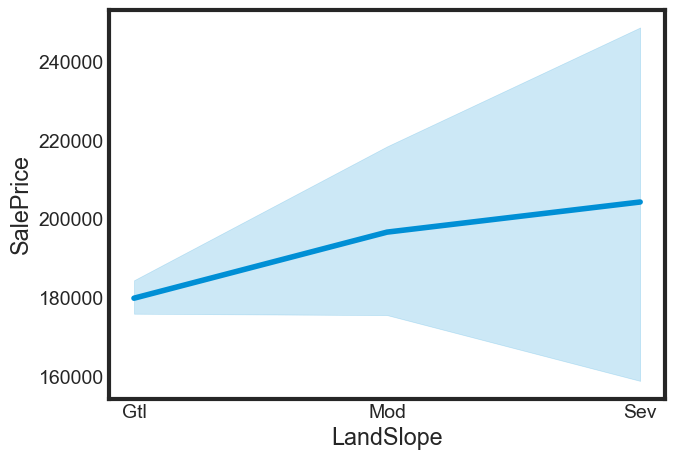

In [239]:
sns.lineplot(data=df,x='LandSlope',y='SalePrice')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

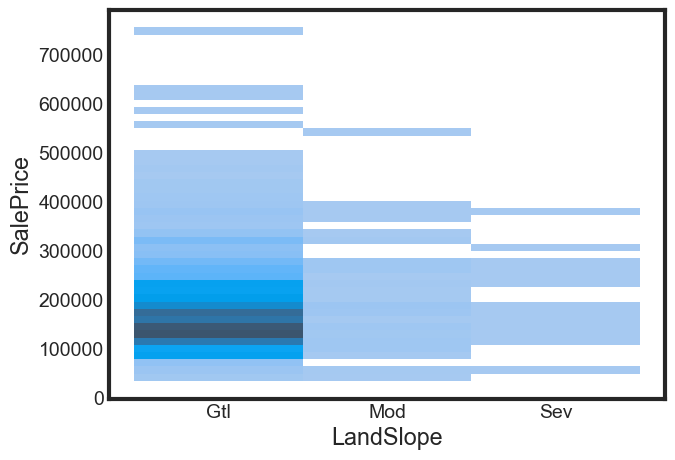

In [240]:
sns.histplot(data=df,x='LandSlope',y='SalePrice')

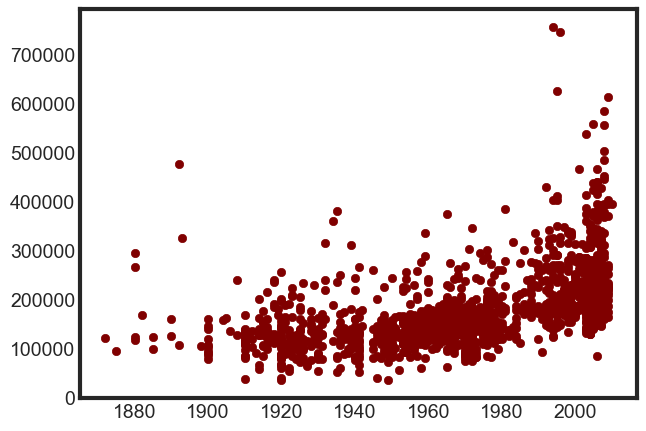

In [241]:
plt.scatter(df["YearBuilt"],df['SalePrice'],color='maroon')

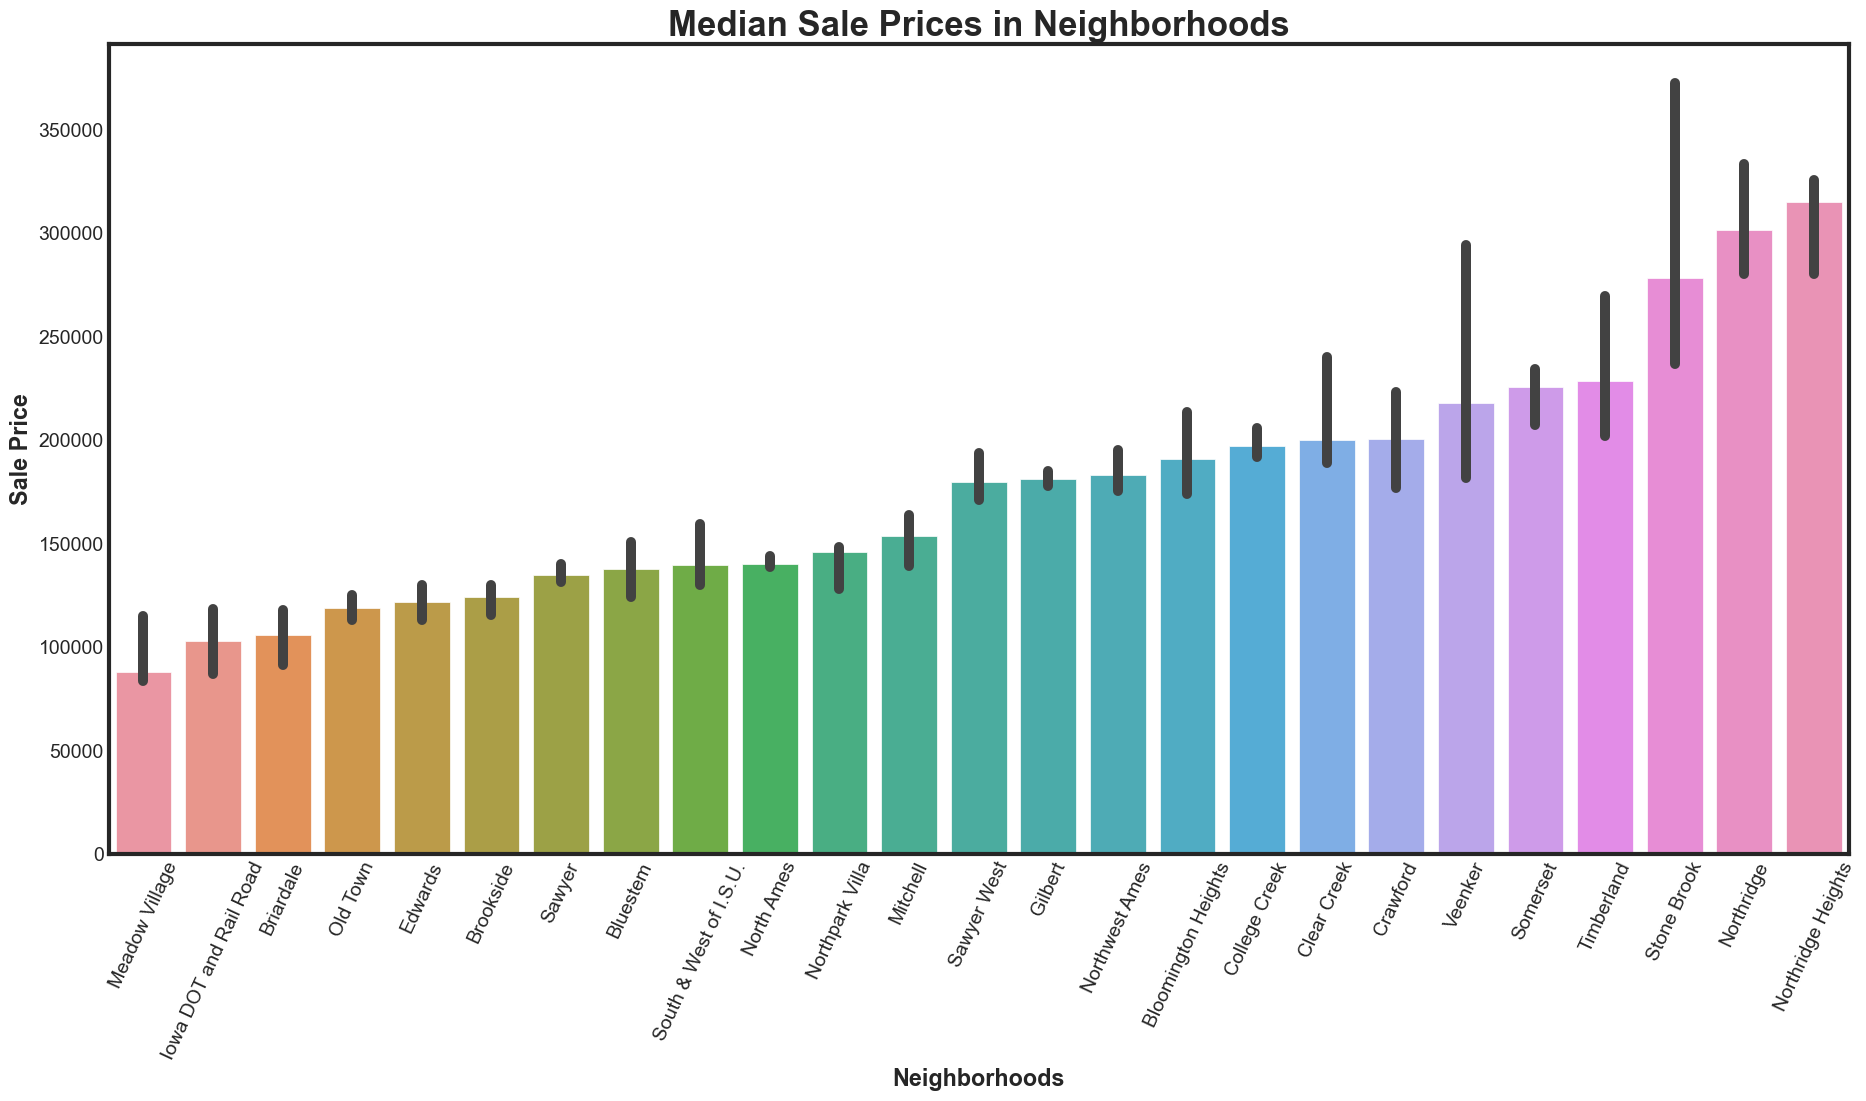

In [248]:
#Sale Prices of property by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=result_df,x='Neighborhood_info',y='SalePrice',order=nei_df.index,estimator=np.median)
#fig = sns.boxplot(data=house_df,x='Neighborhood',y='SalePrice',order=nei_df.index)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Median Sale Prices in Neighborhoods', weight ='bold').set_fontsize('25')
plt.xlabel('Neighborhoods',weight ='bold')
plt.ylabel('Sale Price',weight ='bold');

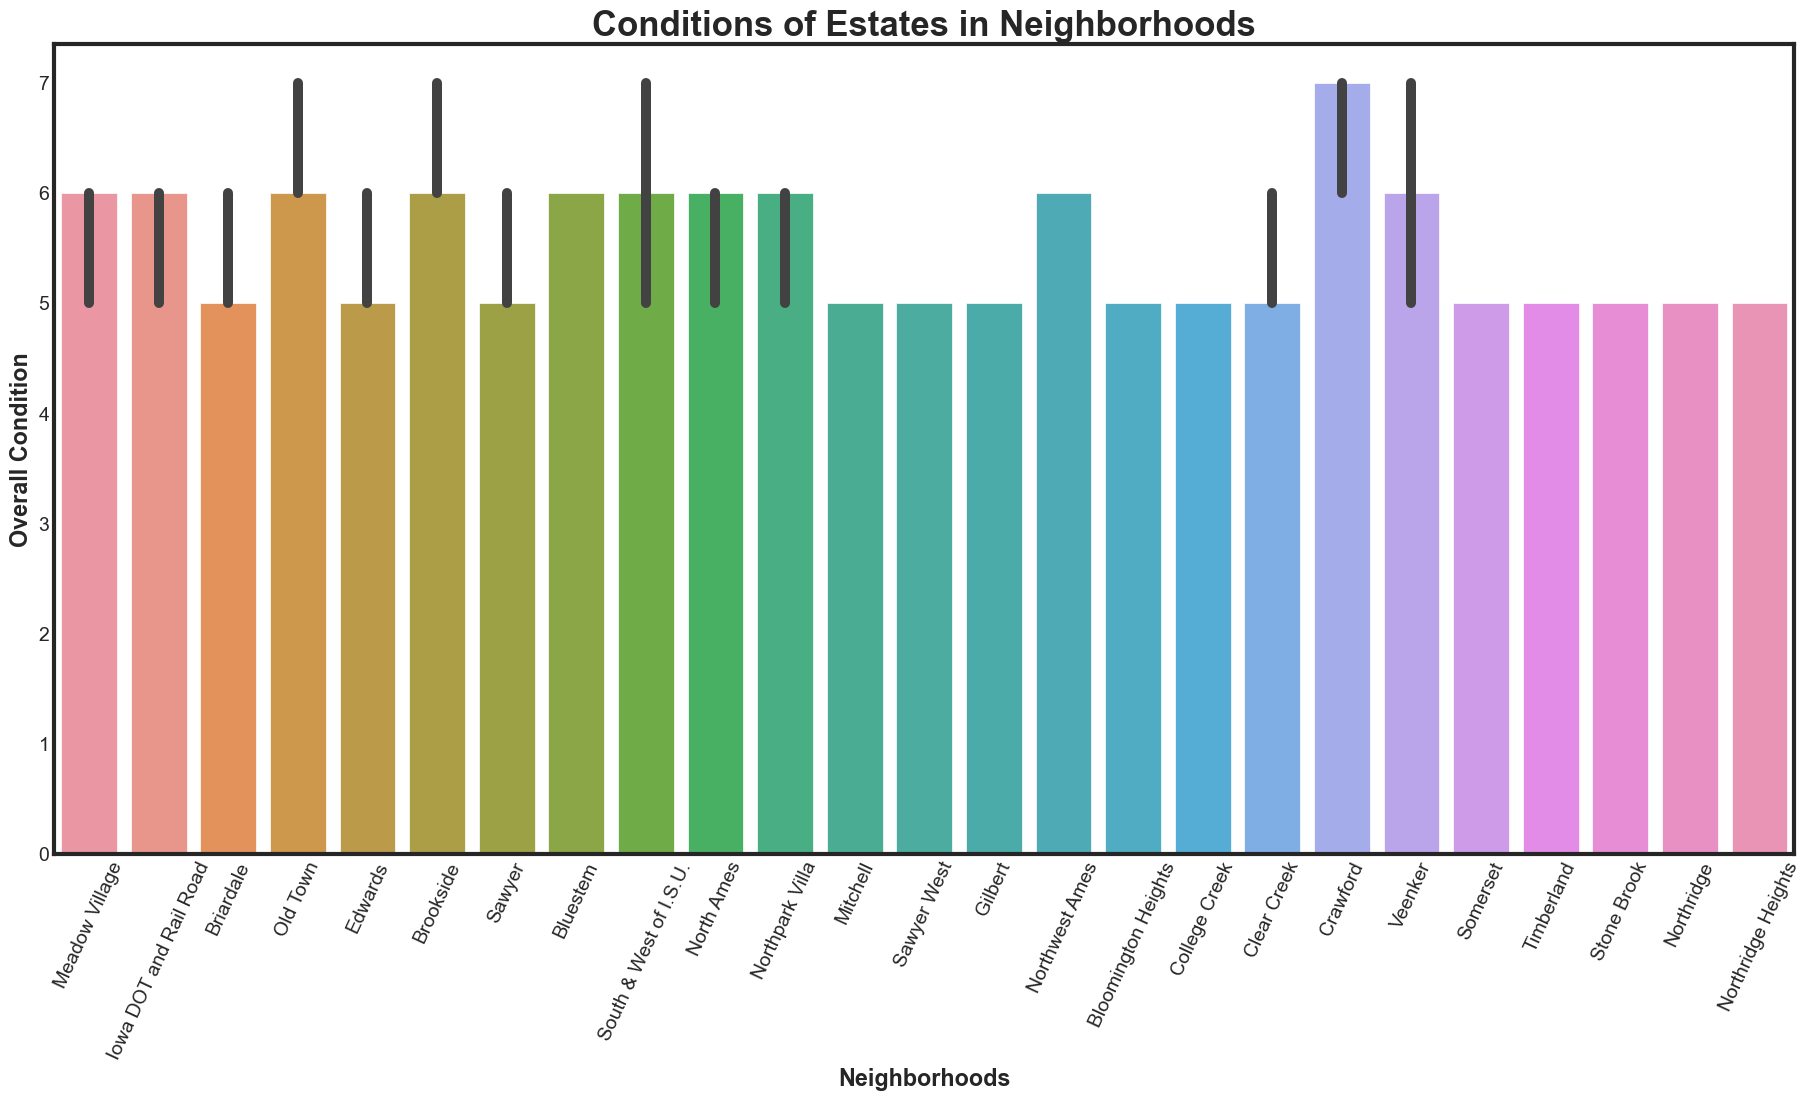

In [249]:
#Overall Conditions for sales by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=result_df,x='Neighborhood_info',y='OverallCond',order=nei_df.index,estimator=np.median)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Conditions of Estates in Neighborhoods',weight ='bold').set_fontsize('25')
plt.xlabel('Neighborhoods',weight ='bold')
plt.ylabel('Overall Condition',weight ='bold');

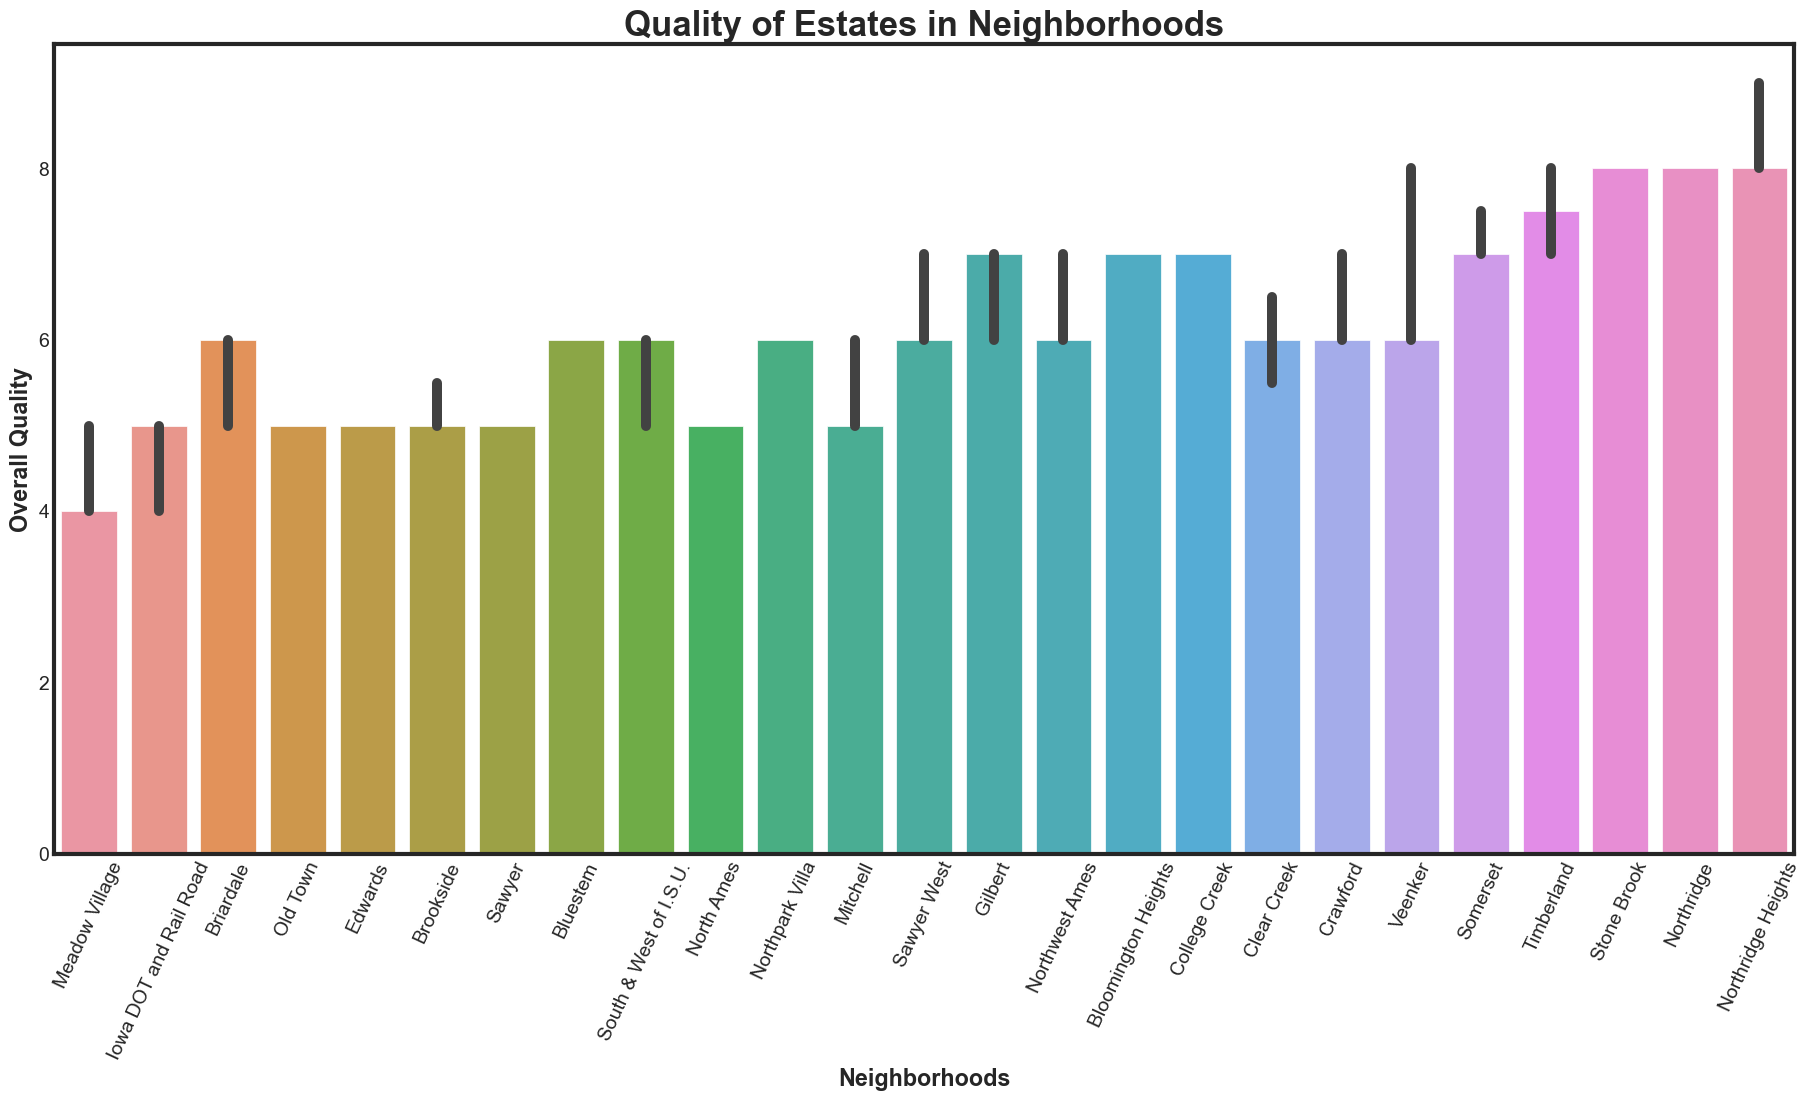

In [250]:
#Overall Quality of property by neighborhood
sns.set_style('white')
fig,sale = plt.subplots(figsize=(20,10))
fig = sns.barplot(data=result_df,x='Neighborhood_info',y='OverallQual',order=nei_df.index,estimator=np.median)
fig=plt.xticks()
plt.xticks(rotation=65)
plt.title('Quality of Estates in Neighborhoods',weight ='bold').set_fontsize('25')
plt.xlabel('Neighborhoods',weight ='bold')
plt.ylabel('Overall Quality',weight ='bold');

In [251]:
#Creating a dataset of neighborhoods with median cheap sales 
cheap_df = result_df[result_df['Neighborhood_info'].isin(nei_df.index[0:8])]
cheap_df.info()
print(nei_df.index[0:10])
cheap_df['LotArea'].median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 8 to 1459
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 417 non-null    int64  
 1   MSSubClass         417 non-null    int64  
 2   MSZoning           417 non-null    object 
 3   LotFrontage        367 non-null    float64
 4   LotArea            417 non-null    int64  
 5   Street             417 non-null    object 
 6   Alley              61 non-null     object 
 7   LotShape           417 non-null    object 
 8   LandContour        417 non-null    object 
 9   Utilities          417 non-null    object 
 10  LotConfig          417 non-null    object 
 11  LandSlope          417 non-null    object 
 12  Neighborhood       417 non-null    object 
 13  Condition1         417 non-null    object 
 14  Condition2         417 non-null    object 
 15  BldgType           417 non-null    object 
 16  HouseStyle         417 no

8250.0

In [252]:
#Creating dataset with neighborhoods with expensive sales
exp_df = result_df[result_df['Neighborhood_info'].isin(nei_df.index[17:])]
exp_df.info()
print(nei_df.index[17:])
exp_df['LotArea'].median()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 1457
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 357 non-null    int64  
 1   MSSubClass         357 non-null    int64  
 2   MSZoning           357 non-null    object 
 3   LotFrontage        298 non-null    float64
 4   LotArea            357 non-null    int64  
 5   Street             357 non-null    object 
 6   Alley              25 non-null     object 
 7   LotShape           357 non-null    object 
 8   LandContour        357 non-null    object 
 9   Utilities          357 non-null    object 
 10  LotConfig          357 non-null    object 
 11  LandSlope          357 non-null    object 
 12  Neighborhood       357 non-null    object 
 13  Condition1         357 non-null    object 
 14  Condition2         357 non-null    object 
 15  BldgType           357 non-null    object 
 16  HouseStyle         357 no

11000.0

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

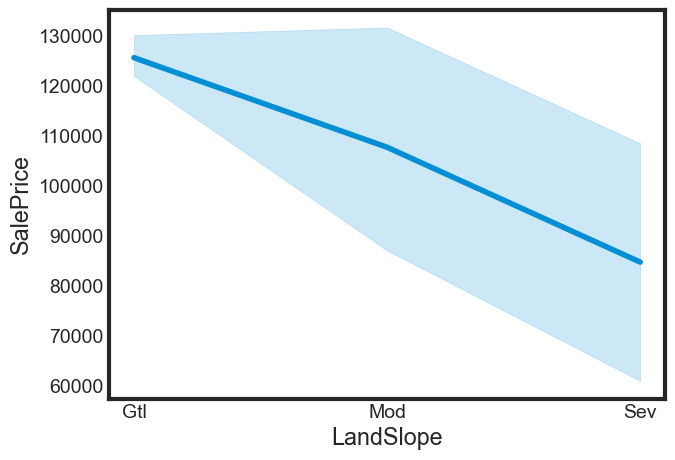

In [253]:
#Looking at land slope in cheap neighborhoods
sns.lineplot(data=cheap_df,x='LandSlope',y='SalePrice')

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

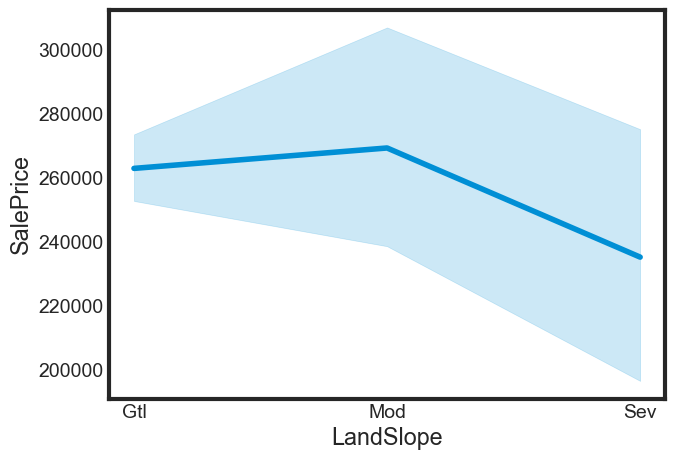

In [254]:
#Looking at land slope in expensive neighborhoods
sns.lineplot(data=exp_df,x='LandSlope',y='SalePrice')

8250.0
5.0
6.0


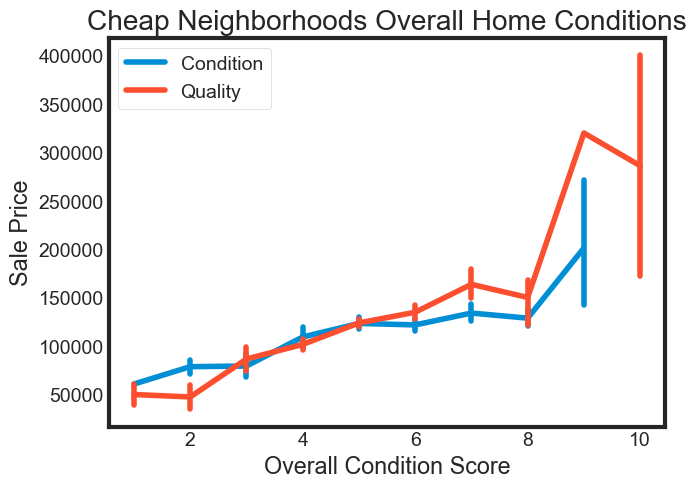

In [255]:
sns.lineplot(data=cheap_df,x='OverallCond',y='SalePrice',err_style='bars')
sns.lineplot(data=cheap_df,x='OverallQual',y='SalePrice',err_style='bars')
plt.title('Cheap Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Condition Score')
plt.ylabel('Sale Price')
plt.legend(['Condition','Quality'],loc = 'upper left')

cheap_df['LotShape'].value_counts()
cheap_df['MSSubClass'].value_counts()
cheap_df['BldgType'].value_counts()
print(cheap_df['LotArea'].median())

#interesting
cheap_df['OverallQual'].value_counts()
print(cheap_df['OverallQual'].median())
cheap_df['OverallCond'].value_counts()
print(cheap_df['OverallCond'].median())

11000.0
7.0
5.0
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
378  379          20       RL         88.0    11394   Pave   NaN      Reg   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
378         Lvl    AllPub  ...    NaN   NaN         NaN       0      6   2010   

    SaleType  SaleCondition  SalePrice  Neighborhood_info  
378      New        Partial     394432        Stone Brook  

[1 rows x 82 columns]


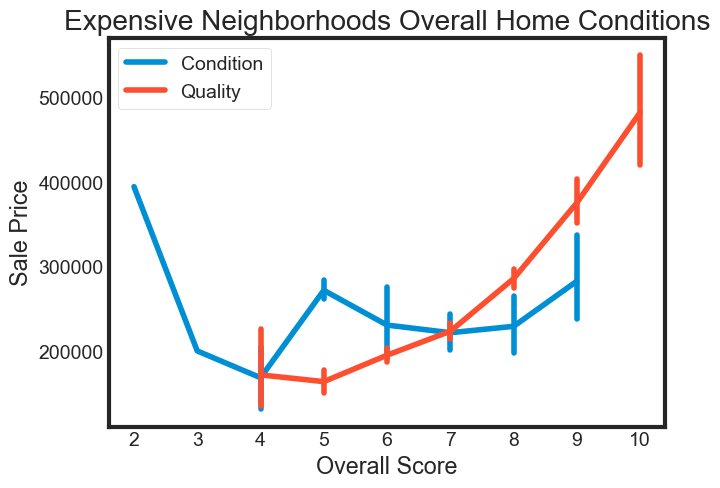

In [256]:
sns.lineplot(data=exp_df,x='OverallCond',y='SalePrice',legend='auto',err_style='bars')
sns.lineplot(data=exp_df,x='OverallQual',y='SalePrice',legend='auto',err_style='bars')
plt.title('Expensive Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Score')
plt.ylabel('Sale Price')
plt.legend(['Condition','Quality'],loc = 'upper left')
exp_df['LotShape'].value_counts()
exp_df['MSSubClass'].value_counts()
exp_df['BldgType'].value_counts()
print(exp_df['LotArea'].median())

#interesting
exp_df['OverallQual'].value_counts()
print(exp_df['OverallQual'].median())
exp_df['OverallCond'].value_counts()
print(exp_df['OverallCond'].median())
print(exp_df[exp_df['OverallCond']==2])

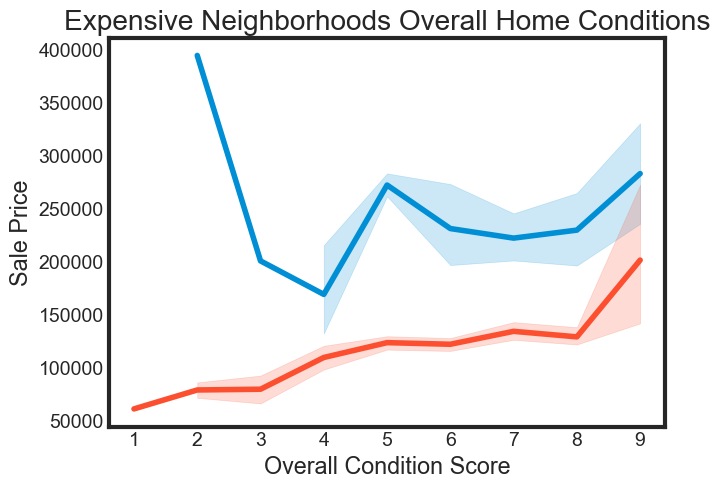

In [257]:
sns.lineplot(data=exp_df,x='OverallCond',y='SalePrice')
sns.lineplot(data=cheap_df,x='OverallCond',y='SalePrice')
plt.title('Expensive Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Condition Score')
plt.ylabel('Sale Price');

Text(0, 0.5, 'Sale Price')

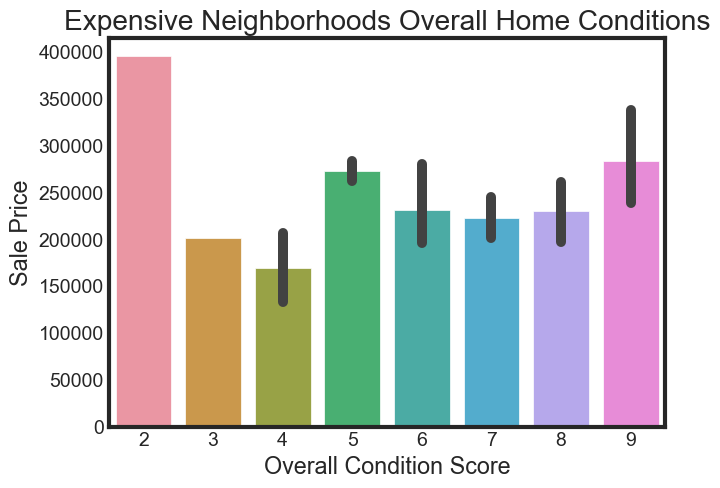

In [174]:
sns.barplot(data=exp_df,x='OverallCond',y='SalePrice')
plt.title('Expensive Neighborhoods Overall Home Conditions')
plt.xlabel('Overall Condition Score')
plt.ylabel('Sale Price')

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

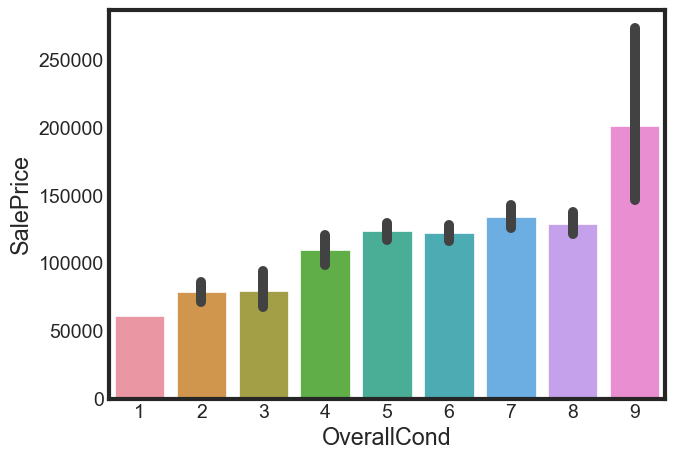

In [175]:
sns.barplot(data=cheap_df,x='OverallCond',y='SalePrice')

# Visualizations by Categories

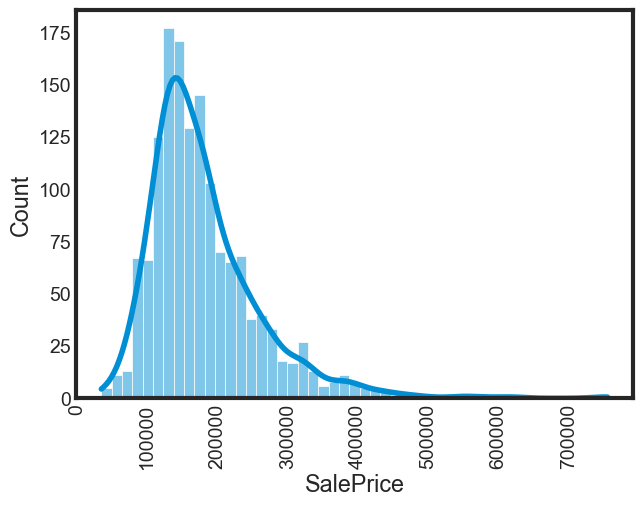

In [202]:
# Distribution of Houses

sns.histplot(df['SalePrice'], kde=True)
# Add tick marks to the x-axis
plt.xticks(rotation=90)  # You can adjust the rotation as needed

# Show the plot
plt.show()

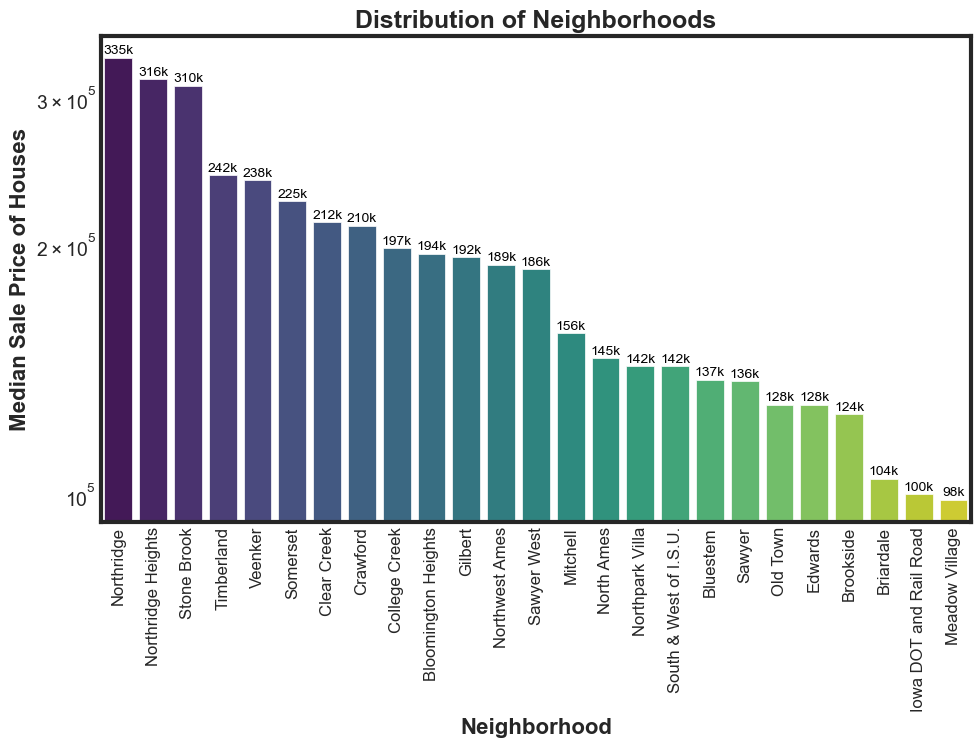

In [200]:
# group data in Neighborhood column and sum
neighborhood_mean = result_df.groupby('Neighborhood_info')['SalePrice'].mean()

# Sort the values in descending order
neighborhood_mean = neighborhood_mean.sort_values(ascending=False)


# Function to format values as '100k'
def format_value(x, pos):
    return f'{int(x/1000)}k'



# create bar plot
plt.figure(figsize= (10, 6))
ax = sns.barplot(x = neighborhood_mean.index, y = neighborhood_mean.values, palette ="viridis")
ax.set_yscale("log")
plt.title('Distribution of Neighborhoods', fontsize = 18, fontweight = 'bold')
plt.xlabel('Neighborhood', fontsize = 16, fontweight = 'bold')
plt.ylabel('Median Sale Price of Houses', fontsize = 16, fontweight = 'bold')

# rotate x axis labels
plt.xticks(rotation = 90, fontsize = 12)

# display actual numbers on the bars
for p in ax.patches:
    ax.annotate(format_value(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# display result
plt.show()

# Statistics

In [178]:
# Create new dataframe with dummy variables for neighborhoods and only numerical fields

df_stats = df.copy()

In [179]:
# # Create dummy variables for the column 'Neighborhood'

# Create dummy variables
dummy_variables = pd.get_dummies(df_stats['Neighborhood_info'], prefix='dummy')

# Concatenate the dummy variables with the original DataFrame
df_stats = pd.concat([df_stats, dummy_variables], axis=1)

# Drop the original column if needed
df_stats = df_stats.drop('Neighborhood_info', axis=1)

# Display the resulting DataFrame
df_stats.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False


In [180]:
# Create a new DataFrame with non-categorical columns
df_no_categorical = df_stats.copy()


In [181]:
df_no_categorical.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False


In [182]:
df_no_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 106 entries, Id to dummy_Veenker
dtypes: bool(25), float64(3), int64(35), object(43)
memory usage: 959.7+ KB


In [183]:

# Loop through columns and remove categorical variables
for column in df_stats.select_dtypes(include='object').columns:
    df_no_categorical = df_no_categorical.drop(column, axis=1)
    
df_no_categorical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,dummy_Northridge Heights,dummy_Northwest Ames,dummy_Old Town,dummy_Sawyer,dummy_Sawyer West,dummy_Somerset,dummy_South & West of I.S.U.,dummy_Stone Brook,dummy_Timberland,dummy_Veenker
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,False,False,False,False,False,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,False,False,False,False,False,True
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,False,False,False,False,False,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,False,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,False,False,False,False,False,False


In [184]:
# Drop features that have numbers that are actually categories
df_no_categorical = df_no_categorical.drop('MSSubClass',axis=1)

In [185]:
# Find columns with missing values and their counts
missing_counts = df_no_categorical.isnull().sum()

# Filter and print columns with missing values
columns_with_missing_values = missing_counts[missing_counts > 0]
print(columns_with_missing_values)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [186]:
# Drop blank Garage year built
# Drop rows where 'GarageYrBlt' is null
df_no_categorical.dropna(subset=['GarageYrBlt'], inplace=True)

In [187]:
# Loop through columns and fill NaN values with the median value for each column

for column_name, column in df_no_categorical.items():
    if column.isna().any():  # Check if the column has any NaN values
        median = column.median()
        df_no_categorical[column_name].fillna(median, inplace=True)

In [188]:
X = df_no_categorical.drop('SalePrice', axis = 1) #keep features only for X
y = df_no_categorical['SalePrice'] #keep target variable only for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [189]:
sc = StandardScaler()
# fit the data i.e. calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [190]:
X_reg = sm.add_constant(X_train_sc) # adding a constant
reg1 = sm.OLS(np.asarray(y_train), X_reg).fit() 
pred = reg1.predict(X_reg) 

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     96.93
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:25:09   Log-Likelihood:                -12987.
No. Observations:                1103   AIC:                         2.609e+04
Df Residuals:                    1044   BIC:                         2.639e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.848e+05    972.797    189.941      0.000    1.83e+05    1.87e+05
Id                            -573.8324   1000.245     -0.574      0.566   -2536.553    1388.888
LotFrontage                  -1514.0545   1255.527     -1.206      0.228   -3977.698     949.589
LotArea                       4664.6718   1179.999      3.953      0.000    2349.231    6980.112
OverallQual                   1.697e+04   1843.039      9.208      0.000    1.34e+04    2.06e+04
OverallCond                   7977.2232   1324.528      6.023      0.000    5378.183    1.06e+04
YearBuilt                     9544.8638   2911.290      3.279      0.001    3832.218    1.53e+04
YearRemodAdd                  -162.4916   1627.996     -0.100      0.921   -3357.009    3032.026
MasVnrArea                    3128.4071   1232.702      2.538      0.011     709.552    5547.262
BsmtFinSF1                    3956.0000   1107.525      3.572      0.000    1782.772    6129.228
BsmtFinSF2                     460.5679   1013.822      0.454      0.650   -1528.792    2449.928
BsmtUnfSF                    -1211.5456    999.323     -1.212      0.226   -3172.456     749.365
TotalBsmtSF                   3102.1270   1403.615      2.210      0.027     347.899    5856.355
1stFlrSF                      1.137e+04   1719.487      6.613      0.000    7997.631    1.47e+04
2ndFlrSF                      5796.7903   1428.866      4.057      0.000    2993.015    8600.566
LowQualFinSF                   239.0409   1055.753      0.226      0.821   -1832.599    2310.681
GrLivArea                     1.352e+04   1597.296      8.465      0.000    1.04e+04    1.67e+04
BsmtFullBath                  2481.8334   1480.952      1.676      0.094    -424.148    5387.815
BsmtHalfBath                  1209.9521   1078.485      1.122      0.262    -906.294    3326.198
FullBath                      2141.6687   1805.175      1.186      0.236   -1400.516    5683.854
HalfBath                      -406.3892   1532.588     -0.265      0.791   -3413.694    2600.915
BedroomAbvGr                 -5997.7148   1563.795     -3.835      0.000   -9066.253   -2929.176
KitchenAbvGr                 -7118.7918   1190.808     -5.978      0.000   -9455.442   -4782.142
TotRmsAbvGrd                  9838.0911   2176.655      4.520      0.000    5566.974    1.41e+04
Fireplaces                    1410.1421   1290.836      1.092      0.275   -1122.787    3943.071
GarageYrBlt                  -2028.5093   2161.083     -0.939      0.348   -6269.070    2212.051
GarageCars                     1.16e+04   2041.843      5.679      0.000    7589.069    1.56e+04
GarageArea                   -1631.6051   2106.036     -0.775      0.439   -5764.150    2500.940
WoodDeckSF                    2841.9370   1093.734      2.598      0.009    

In [191]:
# Step 2 and 3: Iteratively remove features with p-values above 0.05
insig_features = [] # Store names of insignificant features
while True:
    # Get the feature with the highest p-value
    max_pvalue = reg1.pvalues[1:].max()
    if max_pvalue > 0.05:
        feature_to_remove = reg1.pvalues[1:].idxmax()
        insig_features.append(feature_to_remove)
        print(f"Removing feature: {feature_to_remove} (p-value={max_pvalue:.4f})")
        
        # Create a new OLS model without the feature to be removed
        X_reg = X_reg.drop(feature_to_remove, axis=1)
        X_reg = sm.add_constant(X_reg)
        reg1 = sm.OLS(np.asarray(y_train), X_reg).fit()
    else:
        break

Removing feature: EnclosedPorch (p-value=0.9639)
Removing feature: YearRemodAdd (p-value=0.9208)
Removing feature: PoolArea (p-value=0.9043)
Removing feature: LowQualFinSF (p-value=0.8293)
Removing feature: HalfBath (p-value=0.7941)
Removing feature: 2ndFlrSF (p-value=0.7781)
Removing feature: dummy_Brookside (p-value=0.7355)
Removing feature: dummy_Gilbert (p-value=0.8687)
Removing feature: dummy_Sawyer West (p-value=0.8108)
Removing feature: dummy_Meadow Village (p-value=0.7902)
Removing feature: dummy_Iowa DOT and Rail Road (p-value=0.7573)
Removing feature: BsmtFinSF2 (p-value=0.6660)
Removing feature: dummy_Sawyer (p-value=0.6252)
Removing feature: MiscVal (p-value=0.6037)
Removing feature: Id (p-value=0.5854)
Removing feature: dummy_Mitchell (p-value=0.5583)
Removing feature: dummy_North Ames (p-value=0.4325)
Removing feature: BsmtUnfSF (p-value=0.4562)
Removing feature: 3SsnPorch (p-value=0.4362)
Removing feature: dummy_South & West of I.S.U. (p-value=0.3943)
Removing feature: G

In [192]:
# Create a list of statistically significant variables to use for the final model
results = reg1.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred

array(['const', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'dummy_College Creek',
       'dummy_Crawford', 'dummy_Edwards', 'dummy_Northridge',
       'dummy_Northridge Heights', 'dummy_Northwest Ames',
       'dummy_Somerset', 'dummy_Stone Brook'], dtype=object)

array(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'ScreenPorch', 'dummy_College Creek',
       'dummy_Crawford', 'dummy_Edwards', 'dummy_Northridge',
       'dummy_Northridge Heights', 'dummy_Northwest Ames',
       'dummy_Somerset', 'dummy_Stone Brook'], dtype=object)

In [193]:
X_train_new = X_train_sc[stat_sig_Pred]
X_train_new = sm.add_constant(X_train_new)

reg = sm.OLS(np.asarray(y_train), X_train_new).fit()

In [194]:
coef_vec = pd.DataFrame(reg.params.round(2))

coef_vec = coef_vec.reset_index()

coef = coef_vec.rename(columns = {'index':'Variable_Names', 0:'MultiReg_coeff'})

coef

,Variable_Names,MultiReg_coeff
0,const,184773.75
1,LotArea,6447.62
2,OverallQual,17459.74
3,OverallCond,7950.35
4,YearBuilt,10411.25
5,MasVnrArea,2793.04
6,BsmtFinSF1,7122.45
7,1stFlrSF,7700.55
8,GrLivArea,20271.54
9,BedroomAbvGr,-5314.94


In [195]:
print('Forecasted SalePrice =')
for x in range (0, len(coef['Variable_Names'])):
    print( coef['Variable_Names'][x], " * ", coef['MultiReg_coeff'][x], end="")
    if x < len(coef['Variable_Names']) - 1:
        print(" + ")

Forecasted SalePrice =
const  *  184773.75 + 
LotArea  *  6447.62 + 
OverallQual  *  17459.74 + 
OverallCond  *  7950.35 + 
YearBuilt  *  10411.25 + 
MasVnrArea  *  2793.04 + 
BsmtFinSF1  *  7122.45 + 
1stFlrSF  *  7700.55 + 
GrLivArea  *  20271.54 + 
BedroomAbvGr  *  -5314.94 + 
KitchenAbvGr  *  -7251.88 + 
TotRmsAbvGrd  *  9606.77 + 
GarageCars  *  9803.24 + 
WoodDeckSF  *  3101.16 + 
OpenPorchSF  *  2407.77 + 
ScreenPorch  *  3584.15 + 
dummy_College Creek  *  2362.53 + 
dummy_Crawford  *  4106.66 + 
dummy_Edwards  *  -2148.95 + 
dummy_Northridge  *  8881.4 + 
dummy_Northridge Heights  *  10519.08 + 
dummy_Northwest Ames  *  -3443.68 + 
dummy_Somerset  *  4648.63 + 
dummy_Stone Brook  *  7092.33

In [196]:
X_test_new = X_test_sc[stat_sig_Pred] 
print(X_test_new.shape)
X_test_new = sm.add_constant(X_test_sc[stat_sig_Pred])
print(X_test_new.shape)

(276, 23)
(276, 24)


In [197]:
# Predict on the test data, first add constant to match the dimension
X_test_new = X_test_sc[stat_sig_Pred] 
X_test_new = X_test_new.assign(Constant=1)

# Reorder columns to have the constant as the first column
X_test_new = X_test_new[['Constant'] + [col for col in X_test_new.columns if col != 'Constant']]

# Calculate the estimated y values using the test dataset
y_hat_test = reg.predict(X_test_new)

linear_predictions = y_hat_test

In [198]:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test)
test_r_squared = r2_score(y_test, y_hat_test)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test)

r_squared_linear_reg = test_r_squared

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')

The test RMSE is:	34608.252
The test Rsquared is:	0.799
The test MAPE is:	0.1198


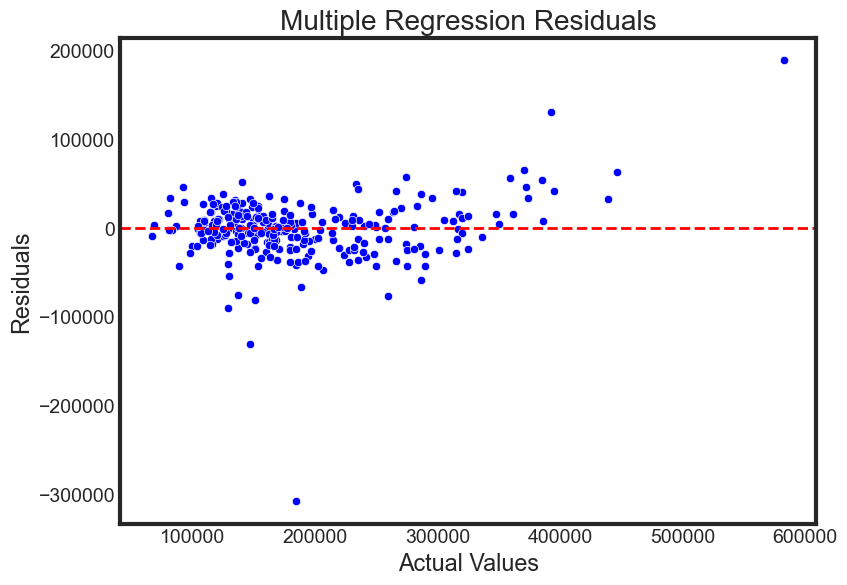

In [199]:
# Calculate the residuals
model = LinearRegression()
model.fit(X_train, y_train)

residuals = y_test - model.predict(X_test)

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Multiple Regression Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()